<a href="https://colab.research.google.com/github/Abyy98/TaskWeeK2/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [213]:
df = pd.read_csv("/content/RTA_Dataset.csv")
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [215]:
df.shape

(12316, 32)

In [216]:
df.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1317,17:00:00,Tuesday,Unknown,Female,Junior high school,Employee,5-10yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury


In [217]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [218]:
df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [219]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [220]:
df.describe(include=['object', 'category'])

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [221]:
duplicates = df.duplicated()
duplicates.sum()

0

In [222]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [223]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [224]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [225]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [227]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [228]:
df['Vehicle_driver_relation'].mode()

,Vehicle_driver_relation
0,Employee


In [229]:
df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0], inplace=True)

In [230]:
df['Type_of_collision'].mode()

,Type_of_collision
0,Vehicle with vehicle collision


In [231]:
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)

In [232]:
df['Road_surface_type'].mode()

,Road_surface_type
0,Asphalt roads


In [233]:
df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0], inplace=True)

In [234]:
df['Road_allignment'].mode()

,Road_allignment
0,Tangent road with flat terrain


In [235]:
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)

In [236]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,0
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [237]:
df = df.dropna()

In [238]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [338]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8,1900-01-01 17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,1900-01-01 17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12,1900-01-01 17:45:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
13,1900-01-01 17:45:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,...,Waiting to go,na,na,na,na,Other,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
14,1900-01-01 17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,1900-01-01 17:25:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Owner,1-2yr,...,Other,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12303,1900-01-01 12:48:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,1900-01-01 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,1900-01-01 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [239]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [339]:
df.isnull()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12303,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12313,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12314,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [340]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [346]:
label_encoder = LabelEncoder()

df['Sex_of_driver'] = label_encoder.fit_transform(df['Sex_of_driver'])
df['Sex_of_casualty'] = label_encoder.fit_transform(df['Sex_of_casualty'])
df
# Male is 1 Female is 0

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8,1900-01-01 17:20:00,Friday,18-30,1,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,1,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,1900-01-01 17:20:00,Friday,18-30,1,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,1,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12,1900-01-01 17:45:00,Thursday,18-30,1,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,2-5yrs,...,Going straight,na,2,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
13,1900-01-01 17:45:00,Thursday,31-50,1,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,...,Waiting to go,na,2,na,na,Other,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
14,1900-01-01 17:45:00,Thursday,31-50,1,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,0,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,1900-01-01 17:25:00,Friday,31-50,1,Junior high school,Employee,5-10yr,Automobile,Owner,1-2yr,...,Other,na,2,na,na,Self-employed,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12303,1900-01-01 12:48:00,Friday,31-50,1,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,0,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,1900-01-01 13:55:00,Sunday,Over 51,1,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,1,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,1900-01-01 13:55:00,Sunday,18-30,0,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,2,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [342]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Sex_of_driver_encoded,Sex_of_casualty_encoded
8,1900-01-01 17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury,1,1
9,1900-01-01 17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury,1,1
12,1900-01-01 17:45:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,2-5yrs,...,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,1,2
13,1900-01-01 17:45:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,...,na,na,na,Other,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury,1,2
14,1900-01-01 17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,1900-01-01 17:25:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Owner,1-2yr,...,na,na,na,Self-employed,Normal,Not a Pedestrian,Moving Backward,Serious Injury,1,2
12303,1900-01-01 12:48:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,1,0
12313,1900-01-01 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,1,1
12314,1900-01-01 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,0,2


In [242]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [243]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
numerical_columns = ['Number_of_vehicles_involved', 'Number_of_casualties']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max = df.copy()
df_min_max[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Standardization
standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

print("Original DataFrame:\n", df)
print("\nMin-Max Scaled DataFrame:\n", df_min_max)
print("\nStandardized DataFrame:\n", df_standard)

Original DataFrame:
            Time Day_of_week Age_band_of_driver Sex_of_driver  \
8      17:20:00      Friday              18-30          Male   
9      17:20:00      Friday              18-30          Male   
12     17:45:00    Thursday              18-30          Male   
13     17:45:00    Thursday              31-50          Male   
14     17:45:00    Thursday              31-50          Male   
...         ...         ...                ...           ...   
12302  17:25:00      Friday              31-50          Male   
12303  12:48:00      Friday              31-50          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
8      Junior high school                Employee         Above 10yr   
9      Junior high school                Employee              1-2

In [244]:
nominal_categorical_columns = [
    'Day_of_week', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation',
    'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
    'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
    'Road_surface_conditions', 'Weather_conditions', 'Type_of_collision', 'Casualty_class', 'Work_of_casuality',
    'Fitness_of_casuality', 'Cause_of_accident', 'Accident_severity'
]


df_encoded = pd.get_dummies(df, columns=nominal_categorical_columns)

print("Original df:", df.head())
print("OneHot Encoded df:", df_encoded.head())

Original df:         Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
8   17:20:00      Friday              18-30          Male  Junior high school   
9   17:20:00      Friday              18-30          Male  Junior high school   
12  17:45:00    Thursday              18-30          Male  Junior high school   
13  17:45:00    Thursday              31-50          Male  Junior high school   
14  17:45:00    Thursday              31-50          Male  Junior high school   

   Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
8                 Employee         Above 10yr      Lorry (41?100Q)   
9                 Employee              1-2yr           Automobile   
12                Employee              1-2yr  Public (> 45 seats)   
13                Employee             5-10yr      Lorry (41?100Q)   
14                Employee         Above 10yr           Automobile   

   Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
8         

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

nm = ['Number_of_vehicles_involved', 'Number_of_casualties']
z_scores = df[nm].apply(zscore)
outliers = (np.abs(z_scores) > 3).any(axis=1)
print("Z-score:", df[outliers])


Z-score:            Time Day_of_week Age_band_of_driver Sex_of_driver  \
226     9:25:00     Tuesday            Unknown        Female   
227     9:25:00     Tuesday            Unknown        Female   
457    11:30:00     Tuesday           Under 18          Male   
458    11:30:00     Tuesday           Under 18          Male   
459    11:30:00     Tuesday              31-50          Male   
...         ...         ...                ...           ...   
11885  20:16:00      Sunday            Unknown          Male   
11918  18:40:00      Friday              18-30          Male   
11922  17:45:00   Wednesday              18-30          Male   
12108  22:05:00      Friday              18-30          Male   
12216  13:57:00   Wednesday            Unknown          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
226     Elementary school                Employee             5-10yr   
227     Elementary school                Employee              1-2yr   
457   

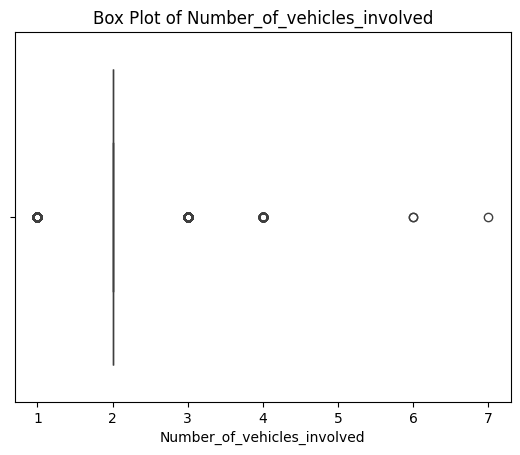

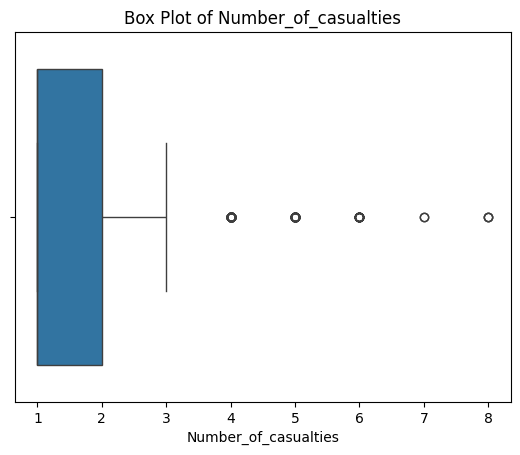

In [246]:
for column in nm:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

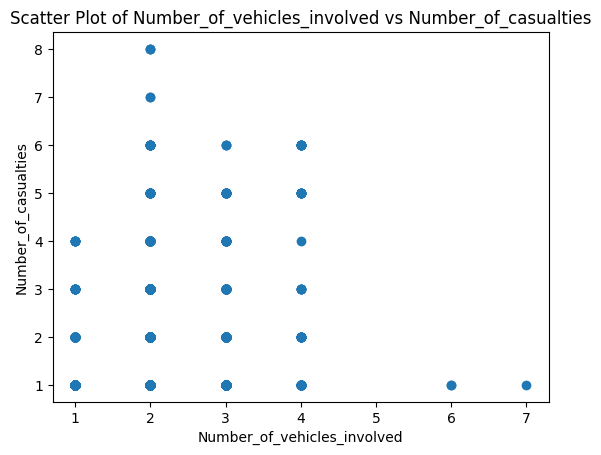

In [247]:
plt.figure()
plt.scatter(df['Number_of_vehicles_involved'], df['Number_of_casualties'])
plt.xlabel('Number_of_vehicles_involved')
plt.ylabel('Number_of_casualties')
plt.title('Scatter Plot of Number_of_vehicles_involved vs Number_of_casualties')
plt.show()

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [248]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [259]:
df.dropna(inplace=True)

In [260]:
df.head(20)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12,17:45:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
13,17:45:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,...,Waiting to go,na,na,na,na,Other,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
14,17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
19,8:20:00,Tuesday,18-30,Male,Junior high school,Employee,Below 1yr,Long lorry,Owner,5-10yrs,...,Going straight,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
21,15:10:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,5-10yrs,...,Moving Backward,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury
25,18:36:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Taxi,Owner,Above 10yr,...,Going straight,Driver or rider,Female,31-50,3,Self-employed,Normal,Not a Pedestrian,Other,Slight Injury
27,14:35:00,Friday,18-30,Male,Above high school,Employee,2-5yr,Automobile,Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
34,13:57:00,Saturday,Over 51,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3024 entries, 8 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         3024 non-null   object
 1   Day_of_week                  3024 non-null   object
 2   Age_band_of_driver           3024 non-null   object
 3   Sex_of_driver                3024 non-null   object
 4   Educational_level            3024 non-null   object
 5   Vehicle_driver_relation      3024 non-null   object
 6   Driving_experience           3024 non-null   object
 7   Type_of_vehicle              3024 non-null   object
 8   Owner_of_vehicle             3024 non-null   object
 9   Service_year_of_vehicle      3024 non-null   object
 10  Defect_of_vehicle            3024 non-null   object
 11  Area_accident_occured        3024 non-null   object
 12  Lanes_or_Medians             3024 non-null   object
 13  Road_allignment              3024 non

In [262]:
df.dtypes


,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


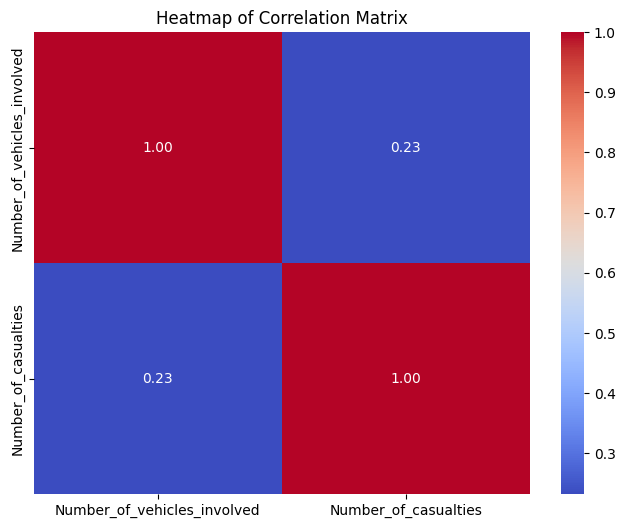

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df[['Number_of_vehicles_involved', 'Number_of_casualties']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()




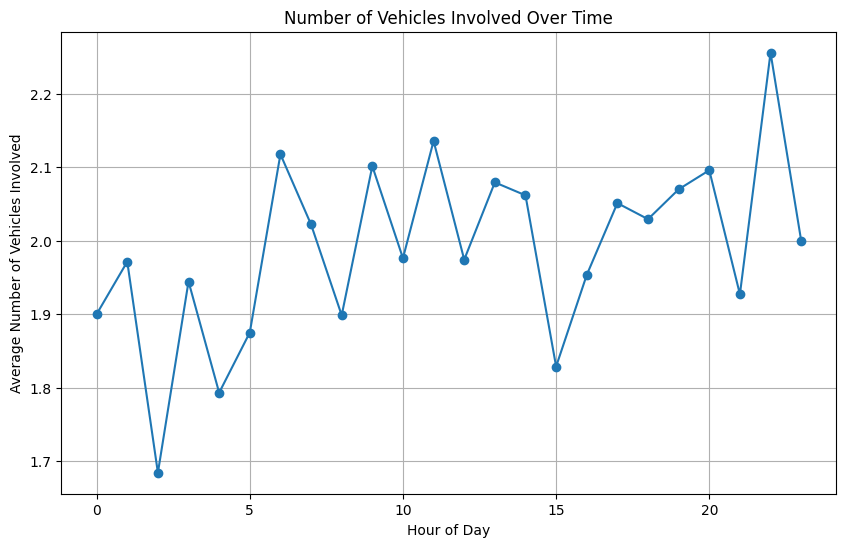

In [275]:

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

time_series = df.groupby(df['Time'].dt.hour)['Number_of_vehicles_involved'].mean()

plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, marker='o')
plt.title('Number of Vehicles Involved Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Vehicles Involved')
plt.grid(True)
plt.show()


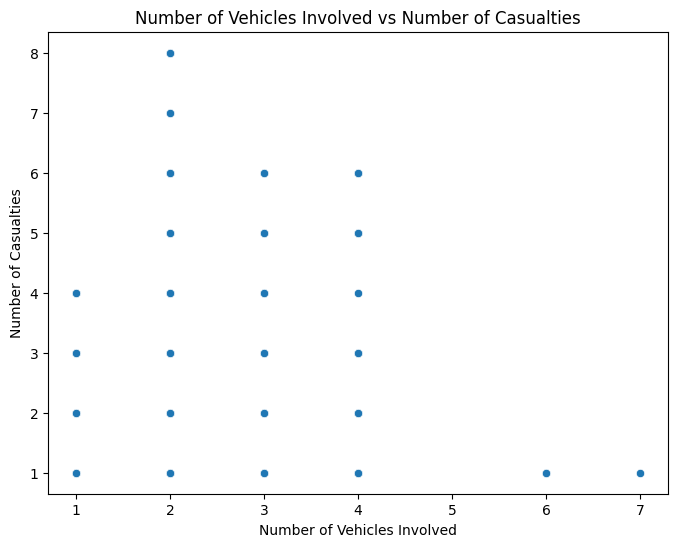

In [277]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number_of_vehicles_involved', y='Number_of_casualties', data=df)
plt.title('Number of Vehicles Involved vs Number of Casualties')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Casualties')
plt.show()


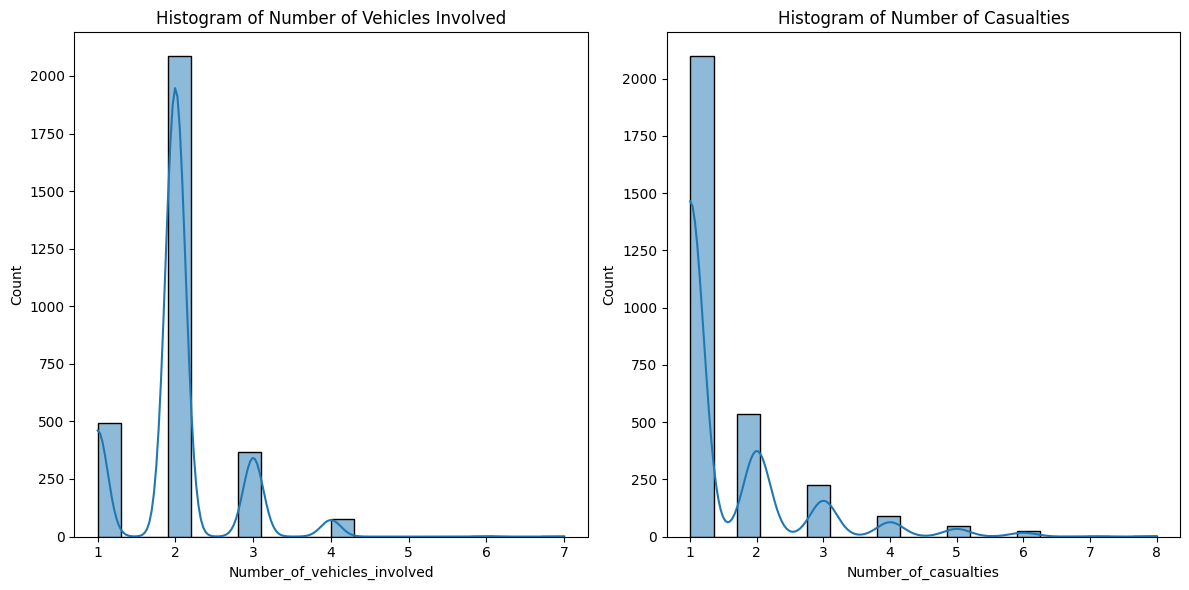

In [292]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Number_of_vehicles_involved'], bins=20, kde=True)
plt.title('Histogram of Number of Vehicles Involved')

plt.subplot(1, 2, 2)
sns.histplot(df['Number_of_casualties'], bins=20, kde=True)
plt.title('Histogram of Number of Casualties')

plt.tight_layout()
plt.show()


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [363]:
features = [ 'Weather_conditions', 'Road_surface_conditions']
target = 'Accident_severity'

X = df[features]
y = df[target]

cf = ['Weather_conditions', 'Road_surface_conditions']
nf = [feature for feature in features if feature not in cf]

preprocessor = ColumnTransformer(transformers=[('num', SimpleImputer(strategy='median'), nf),('cat', OneHotEncoder(handle_unknown='ignore'), cf)])

X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")


Train size: (2116, 13)
Test size: (908, 13)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [362]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_logistic = log_reg.predict(X_test)



Accuracy = accuracy_score(y_test, y_pred_logistic)
rlogistic = classification_report(y_test, y_pred_logistic)

print("Logistic Regression")
print("Accuracy: {Accuracy:.2f}")
print("Classification Report:")
print(rlogistic)


Logistic Regression
Accuracy: {Accuracy:.2f}
Classification Report:
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        13
Serious Injury       0.00      0.00      0.00       120
 Slight Injury       0.85      1.00      0.92       775

      accuracy                           0.85       908
     macro avg       0.28      0.33      0.31       908
  weighted avg       0.73      0.85      0.79       908



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree Classifier

In [361]:
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz
import os

dec_tr = DecisionTreeClassifier(random_state=42)
dec_tr.fit(X_train, y_train)

y_pred_tr = dec_tr.predict(X_test)

Accuracy = accuracy_score(y_test, y_pred_tree)
report_tr = classification_report(y_test, y_pred_tree)

print("Decision Tree Classifier")
print(f"Accuracy: {Accuracy:.2f}")
print("Classification Report:")
print(report_tr)


Decision Tree Classifier
Accuracy: 0.85
Classification Report:
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        13
Serious Injury       0.00      0.00      0.00       120
 Slight Injury       0.85      0.99      0.92       775

      accuracy                           0.85       908
     macro avg       0.28      0.33      0.31       908
  weighted avg       0.73      0.85      0.78       908



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Support Vector Machine (SVM)


In [364]:
from sklearn.svm import SVC
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_preda_svm = svm.predict(X_test)
Accuracy = accuracy_score(y_test, y_preda_svm)
rpt_svm = classification_report(y_test, y_preda_svm)

print("SVM")
print(f"Accuracy: {Accuracy:.2f}")
print("Classification Report:")
print(rpt_svm)


SVM
Accuracy: 0.85
Classification Report:
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        13
Serious Injury       0.00      0.00      0.00       120
 Slight Injury       0.85      1.00      0.92       775

      accuracy                           0.85       908
     macro avg       0.28      0.33      0.31       908
  weighted avg       0.73      0.85      0.79       908



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [321]:
print(X.shape)

(3024, 2)


#### K-Neighbors Classifier

In [359]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_preda_knn = knn.predict(X_test)

Accuracy = accuracy_score(y_test, y_preda_knn)
rpt_knn = classification_report(y_test, y_preda_knn)

#acc_knn
#rpt_knn
print("Knn")
print(f"Accuracy: {Accuracy:.2f}")
print("Classification Report:")
print(rpt_knn)

Knn
Accuracy: 0.84
Classification Report:
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        13
Serious Injury       0.14      0.02      0.03       120
 Slight Injury       0.85      0.98      0.91       775

      accuracy                           0.84       908
     macro avg       0.33      0.33      0.31       908
  weighted avg       0.75      0.84      0.78       908



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [336]:
acc_knn

0.8425110132158591

In [337]:
rpt_knn

'                precision    recall  f1-score   support\n\n  Fatal injury       0.00      0.00      0.00        13\nSerious Injury       0.14      0.02      0.03       120\n Slight Injury       0.85      0.98      0.91       775\n\n      accuracy                           0.84       908\n     macro avg       0.33      0.33      0.31       908\n  weighted avg       0.75      0.84      0.78       908\n'

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [358]:
print(f'Accuracy: {Accuracy:.2f}')

Accuracy: 0.85


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

 Compare Metrics :Support Vector Machine(SVM) is the best becose handle and approbrait with the datasets small also not complex
 Decision Tree use for big data


Number of Vehicles Involved and Number of Casualties has a Heatmap Correlation so if Number of Vehicles Involved tow prospect Number of Casualtie 1


Future Improvements: used anthor way to fillin null value and if undrstand ML more than now, I can do this better ):